In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import healpy as hp
import schnell as snl
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import rc
import itertools as it
rc('font', **{'family': 'sans-serif',
              'sans-serif': ['Helvetica']})
rc('text', usetex=False)

lisa_old = [snl.LISADetector2(i, is_L5Gm=True) for i in range(3)]
lisa = [snl.LISADetector2(i, is_L5Gm=False) for i in range(3)]
alia = [snl.ALIADetector2(i) for i in range(3)]
lisalia = [snl.LISAandALIADetector(i) for i in range(6)]
twolisas = [snl.TwoLISADetector(i) for i in range(6)]
#star = [snl.BBOStarDetector(i) for i in range(6)]
mlisa_2 = [snl.MultipleLISADetector(i, 2) for i in range(6)]
mlisa_5 = [snl.MultipleLISADetector(i, 5) for i in range(15)]

range_mlisas = [8, 9]
mlisas = [[snl.MultipleLISADetector(i, n) for i in range(3*n)] for n in range_mlisas]

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Run of {}".format(current_time))

Run of 09:40:15


In [4]:
t_obs = 4 # years
obs_time = t_obs * 365 * 24 * 3600
freqs = np.geomspace(1E-4, 0.2, 1001)
f_ref = 1E-2
nside = 64

freqs_lr = np.geomspace(1E-4, 0.2, 101)
nside_lr = 32

npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))
f_obs = 1e-2

rhoLO = snl.NoiseCorrelationLISA(lisa_old[0])
rhoL = snl.NoiseCorrelationLISA(lisa[0])
rhoA = snl.NoiseCorrelationLISAlike(alia[0])
rhoLA = snl.NoiseCorrelationLISALIA(lisalia[0])
rhoTL = snl.NoiseCorrelationTwoLISA(twolisas[0])
rhoML_2 = snl.NoiseCorrelationMultipleLISA(mlisa_2[0])
rhoML_5 = snl.NoiseCorrelationMultipleLISA(mlisa_5[0])

rho_mlisas = [snl.NoiseCorrelationMultipleLISA(mlisas[n][0]) for n in range(len(mlisas))]


mcLO = snl.MapCalculator(lisa_old, f_pivot=f_ref,
                       corr_matrix=rhoLO)
mcL = snl.MapCalculator(lisa, f_pivot=f_ref,
                       corr_matrix=rhoL)
mcA = snl.MapCalculator(alia, f_pivot=f_ref,
                       corr_matrix=rhoA)
mcLA = snl.MapCalculator(lisalia, f_pivot=f_ref,
                       corr_matrix=rhoLA)
mcTL = snl.MapCalculator(twolisas, f_pivot=f_ref,
                       corr_matrix=rhoTL)
mcML_2 = snl.MapCalculator(mlisa_2, f_pivot=f_ref,
                       corr_matrix=rhoML_2)
mcML_5 = snl.MapCalculator(mlisa_5, f_pivot=f_ref,
                       corr_matrix=rhoML_5)

mc_mlisas = [snl.MapCalculator(mlisas[n], f_pivot=f_ref,
                       corr_matrix=rho_mlisas[n]) for n in range(len(mlisas))]


start_color = np.array((0, 0, 0, 1))
end_color = np.array((0, 1, 1, 1))
def choose_color(i, n, st_c=start_color, en_c=end_color):
    return st_c + (en_c-st_c) * i / n

## Computing MLs

In [5]:
nl_mlisas = []
for n in range(len(mlisas)):
    nl_mlisas.append(mc_mlisas[n].get_N_ell(obs_time, freqs_lr, nside_lr, is_fspacing_log=True))
    np.save(f'npy_saves/nl_ML{range_mlisas[n]}', nl_mlisas[-1])
    curr_time = datetime.now().strftime("%H:%M:%S")
    print(f'ML{range_mlisas[n]} done at {curr_time}')

ML8 done at 12:09:25
ML9 done at 12:09:25


In [5]:
with open('npy_saves/nlL.npy', 'rb') as file:
    nlL = np.load(file)
with open('npy_saves/nlTL.npy', 'rb') as file:
    nlTL = np.load(file)
with open('npy_saves/nl_ML3.npy', 'rb') as file:
    nl_ML3 = np.load(file)
with open('npy_saves/nl_ML3.npy', 'rb') as file:
    nl_ML4 = np.load(file)
with open('npy_saves/nl_ML5.npy', 'rb') as file:
    nl_ML5 = np.load(file)
with open('npy_saves/nl_ML6.npy', 'rb') as file:
    nl_ML6 = np.load(file)
with open('npy_saves/nl_ML7.npy', 'rb') as file:
    nl_ML7 = np.load(file)
with open('npy_saves/nl_ML8.npy', 'rb') as file:
    nl_ML8 = np.load(file)
with open('npy_saves/nl_ML9.npy', 'rb') as file:
    nl_ML9 = np.load(file)

nb_lisas = np.arange(1, 10)
nl_MLs = np.array([nlL, nlTL, nl_ML3, nl_ML4, nl_ML5, nl_ML6, nl_ML7, nl_ML8, nl_ML9])

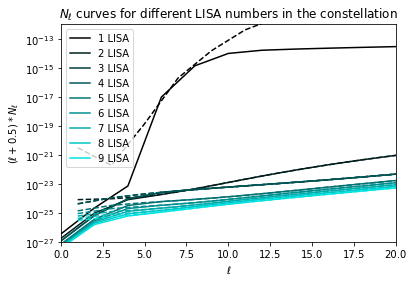

In [19]:
ls = np.arange(len(nlL))

for i in range(len(nb_lisas)):
    plt.plot(ls[::2], ((ls+.5)*nl_MLs[i])[::2], color=choose_color(i, len(nb_lisas)), label=f'{nb_lisas[i]} LISA')
    plt.plot(ls[1::2], ((ls+.5)*nl_MLs[i])[1::2], '--', color=choose_color(i, len(nb_lisas)))
"""
plt.plot(ls[1::2], ((ls+.5)*nlL)[1::2], '--', label='1 LISA')
plt.plot(ls[1::2], ((ls+.5)*nlTL)[1::2], '--', label='2 LISAs')
plt.plot(ls[1::2], ((ls+.5)*nl_ML3)[1::2], '--', label='3 LISAs')
plt.plot(ls[1::2], ((ls+.5)*nl_ML5)[1::2], '--', label='5 LISAs')
plt.plot(ls[1::2], ((ls+.5)*nl_ML6)[1::2], '--', label='6 LISAs')
plt.plot(ls[1::2], ((ls+.5)*nl_ML7)[1::2], '--', label='7 LISAs')
plt.plot(ls[1::2], ((ls+.5)*nl_ML8)[1::2], '--', label='8 LISAs')
plt.plot(ls[1::2], ((ls+.5)*nl_ML9)[1::2], '--', label='9 LISAs')



plt.plot(ls[::2], ((ls+.5)*nlL)[::2], label='1 LISA')
plt.plot(ls[::2], ((ls+.5)*nlTL)[::2], label='2 LISAs')
plt.plot(ls[::2], ((ls+.5)*nl_ML3)[::2], label='3 LISAs')
plt.plot(ls[::2], ((ls+.5)*nl_ML5)[::2], label='5 LISAs')
plt.plot(ls[::2], ((ls+.5)*nl_ML6)[::2], label='6 LISAs')
plt.plot(ls[::2], ((ls+.5)*nl_ML7)[::2], label='7 LISAs')
plt.plot(ls[::2], ((ls+.5)*nl_ML8)[::2], label='8 LISAs')
plt.plot(ls[::2], ((ls+.5)*nl_ML9)[::2], label='9 LISAs')
"""
plt.yscale('log')
plt.legend()
plt.xlim(0, 20)
plt.ylim(1e-27, 1e-12)
plt.xlabel('$\ell$')
plt.ylabel('$(\ell + 0.5) * N_\ell$')
plt.title('Evolution of $N_\ell$ curve with number of LISA')
plt.title('$N_\ell$ curves for different LISA numbers in the constellation')
plt.savefig('nell_mls')
plt.show();

In [14]:
def compare_ML(ell, nbl=nb_lisas, nl_mlisas=nl_MLs, relative=False, show=True, save=False):
    if relative:
        plt.plot(nbl, nl_mlisas[:, ell] / nl_mlisas[0, ell], '.')
        plt.ylabel('$N_\ell$ relative to the one LISA case')
    else:
        plt.plot(nbl, (ell + .5) * nl_mlisas[:, ell], '.')
        plt.ylabel(f'$(\ell + 1/2) * N_\ell$ : $\ell={ell}$')
    plt.yscale('log')
    plt.xlabel('Number of LISA constellations')
    plt.title(f'Effect of multiple LISAs on $N_\ell$ : $\ell={ell}$')
    if save:
        plt.savefig(f'nell_nb_L_ell{ell}')
    if show:
        plt.show();

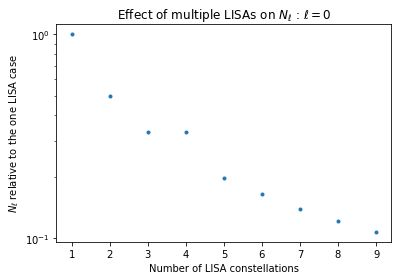

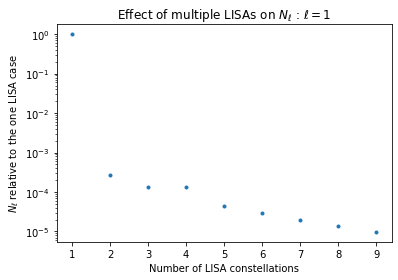

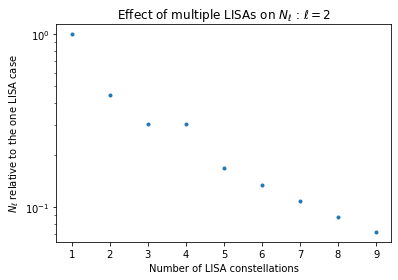

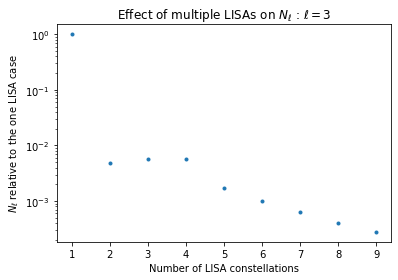

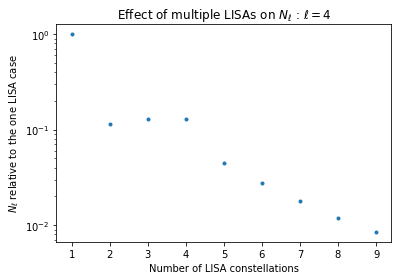

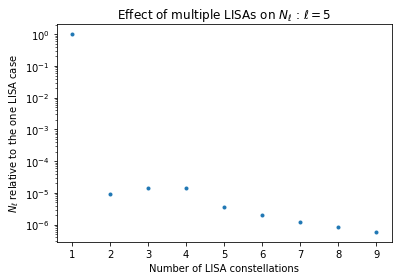

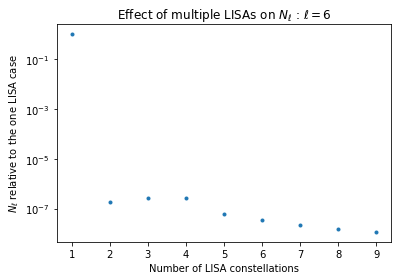

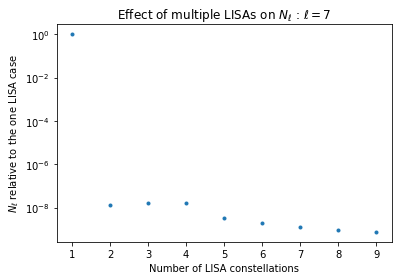

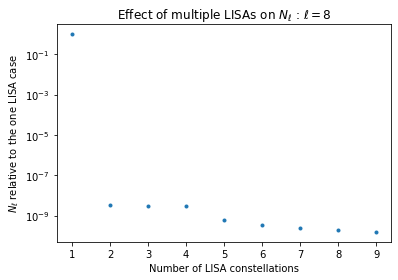

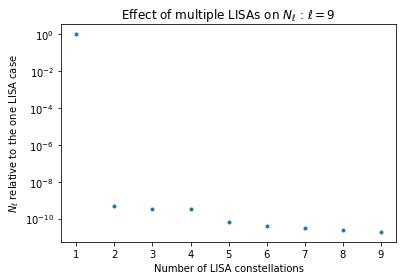

In [15]:
for l in range(10):
    compare_ML(l, relative=True, save=True)

## Check ML

In [6]:
with open('npy_saves/nlL.npy', 'rb') as file:
    nlL = np.load(file)
with open('npy_saves/nlTL.npy', 'rb') as file:
    nlTL = np.load(file)
with open('npy_saves/nlML_2.npy', 'rb') as file:
    nlML_2 = np.load(file)
with open('npy_saves/nlML_5.npy', 'rb') as file:
    nlML_5 = np.load(file)

In [8]:
nlL = mcL.get_N_ell(obs_time, freqs_lr, nside_lr, is_fspacing_log=True)
print('LISA done')
nlTL = mcTL.get_N_ell(obs_time, freqs_lr, nside_lr, is_fspacing_log=True)
print('Two LISAs done')

LISA done
Two LISAs done


In [5]:
nlML_2 = mcML_2.get_N_ell(obs_time, freqs_lr, nside_lr, is_fspacing_log=True)

In [7]:
nlML_5 = mcML_5.get_N_ell(obs_time, freqs_lr, nside_lr, is_fspacing_log=True)

In [10]:
#np.save('npy_saves/nlL', nlL)
#np.save('npy_saves/nlTL_opposite', nlTL)
#np.save('npy_saves/nlML_2', nlML_2)
#np.save('npy_saves/nlML_5', nlML_5)

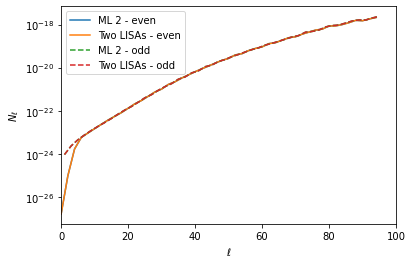

In [9]:
ls = np.arange(len(nlML_2))

plt.plot(ls[::2], ((ls+.5)*nlML_2)[::2], label = 'ML 2 - even')
#plt.plot(ls[::2], ((ls+.5)*nlML_5)[::2], label = 'ML 5 - even')
#plt.plot(ls[::2], ((ls+.5)*nlL)[::2], label = 'LISA - even')
plt.plot(ls[::2], ((ls+.5)*nlTL)[::2], label = 'Two LISAs - even')

plt.plot(ls[1::2], ((ls+.5)*nlML_2)[1::2], '--', label = 'ML 2 - odd')
#plt.plot(ls[::2], ((ls+.5)*nlML_5)[1::2], '--', label = 'ML 5 - odd')
#plt.plot(ls[1::2], ((ls+.5)*nlL)[1::2], '--', label = 'LISA - odd')
plt.plot(ls[1::2], ((ls+.5)*nlTL)[1::2], '--', label = 'Two LISAs - odd')

plt.yscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$N_\ell$')
plt.xlim(0, 100)
plt.legend()
plt.show();